# Deep learning Based Facial Recognition
## VGGFace2

In [1]:
!pip install facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 89.8 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.21.5
    Uninstalling nvidia-nccl-cu12-2.21.5:
  

In [1]:
import torch
from torchvision import transforms
from facenet_pytorch import MTCNN, InceptionResnetV1
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
# Initialize MTCNN and InceptionResnetV1
mtcnn = MTCNN()
resnet = InceptionResnetV1(pretrained='vggface2').eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [4]:
# Load the image
image = cv2.imread('/content/babar-kohli.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5]:
# Detect faces using MTCNN
faces = mtcnn.detect(image_rgb)

In [6]:
# Create a list to store recognized identities
recognized_identities = []

In [7]:
# Perform face recognition on each detected face
for i, face_info in enumerate(faces[0]):  # Access the first element of the faces list
    # Check if a face is detected
    if face_info is not None:
        # Crop and resize the face
        x, y, w, h = map(int, face_info)  # Convert coordinates to integers
        face = image[y:y+h, x:x+w]
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (160, 160))

        # Convert the face to a PyTorch tensor
        face_tensor = torch.tensor(face).permute(2, 0, 1).unsqueeze(0).float() / 255.0

        # Generate an embedding using InceptionResnetV1
        embedding = resnet(face_tensor)

        # Here, you would typically compare the embedding to known embeddings
        # For demonstration, we'll just draw the face region and label it
        recognized_identities.append(f"Person {i + 1}")
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

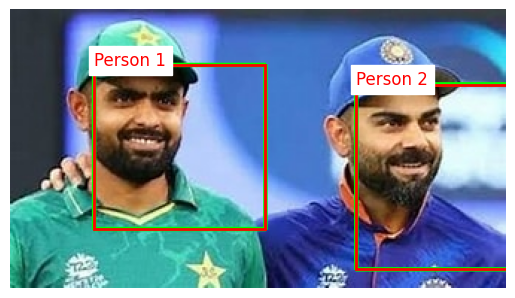

Recognized Identities: ['Person 1', 'Person 2']


In [8]:
# Display the image with detected faces and recognized identities using Matplotlib
fig, ax = plt.subplots(1)
ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Draw bounding boxes and labels for recognized identities
for i, face_info in enumerate(faces[0]):  # Access the first element of the faces list
    # Check if a face is detected
    if face_info is not None:
        x, y, w, h = map(int, face_info)  # Convert coordinates to integers
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.annotate(recognized_identities[i], (x, y), color='r', fontsize=12, backgroundcolor='w')

plt.axis('off')
plt.show()

# Print the recognized identities
print("Recognized Identities:", recognized_identities)